<a href="https://colab.research.google.com/github/KryssyCo/DS-Unit-2-Regression-Classification/blob/master/Krista_Shepard_DSPS2_U2S5M4_Submission_1_Assignment_4_Regression_Classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [X] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [X] Do train/validate/test split with the Tanzania Waterpumps data.
- [X] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [X] Use scikit-learn for logistic regression.
- [X] Get your validation accuracy score.
- [X] Get and plot your coefficients.
- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [X] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [X] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [X] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 133kB 28.5MB/s 
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
     |████████████████████████████████| 614kB 58.4MB/s 
     |████████████████████████████████| 225kB 50.9MB/s 
     |████████████████████████████████| 768kB 46.4MB/s 
     |████████████████████████████████| 51kB 27.0MB/s 
     |████████████████████████████████| 194kB 55.1MB/s 
     |████████████████████████████████| 737kB 50.5MB/s 
     |████████████████████████████████| 51kB 26.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=3b33ea5b52d49714473f0e376d9749fd752008eb2587363c4b5401a97fb02aa4
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=e41aafc7963233e0413f4b7b0f7a6f2a01caf394

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import numpy as np
import category_encoders as ce

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [0]:
## Set display cap for 
## rows and columns
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1500)

In [5]:
# There is nothing to clean in this data set
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
# There is nothing to clean in this data set either.
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


### Stretch Goal - Clean Data

[X] train_features

[] test_features

## Explore train_features data set and clean it.

In [7]:
print(train_features.shape)
train_features.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
## Show numeric features
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
## Show categorical features
train_features.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [10]:
# Convert date_recorded to pandas to_date time

train_features['date_recorded'] = pd.to_datetime(train_features['date_recorded'], infer_datetime_format=True)
train_features['date_recorded'].describe()

count                   59400
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [0]:
# Look at 'recorded by' and drop if all values are GeoData Consultants Ltd . 
# It is data that is not important to the set, it is ok tp drop the columns to 
# clean the data

train_features['recorded_by'].value_counts()

train_features = train_features.drop(columns=['recorded_by'])

## Look at columns that may be duplicating other columns. 
### I've removed any data exploration which resulted in keeping a column.


### waterpoint_type : The kind of waterpoint
### waterpoint_type_group : The kind of waterpoint

In [12]:
train_features['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [13]:
train_features['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [0]:
## These columns contain almost the exact same information, the only difference
## is the number of communal standpipe's. I have decided it would be ok to drop 
## one of them.
## I have chosen to use waterpoint_type_group because it seems to be a 
## more thorough count of communal standpipes.

train_features = train_features.drop(columns=['waterpoint_type'])

### source : The source of the water
### source_type : The source of the water
### source_class: The source of the water -  This columns holds different information than the other columns ,so I will leave it as is.

In [15]:
train_features['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [16]:
train_features['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [0]:
## Source and source type columns are the same except source_type combines some 
## of the information that is in source.
## I have chosen to use the  'source' column because it provides more
## specificity to the data.

train_features = train_features.drop(columns=['source_type'])

### quantity : The quantity of water
### quantity_group : The quantity of water


In [18]:
train_features['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [19]:
train_features['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [0]:
## These two features are exactly alike I am going to drop quantity_group
## and keep quantity

train_features = train_features.drop(columns=['quantity_group'])

### water_quality : The quality of the water
### quality_group : The quality of the water

In [21]:
train_features['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [22]:
train_features['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [0]:
## Water_quality and quality_group columns are the same except quality_group 
## combines some of the information that is in water quality.
## I have chosen to use the water_quality column because it provides more
## specificity to the data.

train_features = train_features.drop(columns=['quality_group'])

### payment : What the water costs
### payment_type : What the water costs

In [24]:
train_features['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [25]:
train_features['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [0]:
## These two features are exactly alike I am going to drop payment_type
## and keep payment.

train_features = train_features.drop(columns=['payment_type'])

## management : How the waterpoint is managed
## management_group : How the waterpoint is managed

In [27]:
train_features['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [28]:
train_features['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [0]:
## Management and management_group columns are the same except management_group 
## combines some of the information that is in management.
## I have chosen to use the management column because it provides more
## specificity to the data.

train_features = train_features.drop(columns=['management_group'])

### extraction_type : The kind of extraction the waterpoint uses
### extraction_type_group : The kind of extraction the waterpoint uses
### extraction_type_class : The kind of extraction the waterpoint uses

In [30]:
train_features['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [31]:
train_features['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [32]:
train_features['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [0]:
## These all share some of the same values, I am going to attempt to combine the 
## three columns into one.

train_features['extraction_type_group_class'] = train_features['extraction_type'].str.cat(train_features['extraction_type_group'], sep =", ")
train_features = train_features.drop(columns=['extraction_type_group'])
train_features = train_features.drop(columns=['extraction_type'])

In [0]:
train_features['extraction_type_group_class'] = train_features['extraction_type_group_class'].str.cat(train_features['extraction_type_class'], sep =", ")
train_features = train_features.drop(columns=['extraction_type_class'])

### scheme_management : Who operates the waterpoint
### scheme_name : Who operates the waterpoint

## These two columns are quite different. I will keep them both in the dataframe.



### region_code : Geographic location (coded)
### district_code : Geographic location (coded)

## These two columns are quite different. I will keep them both in the dataframe.

### subvillage : Geographic location
### region : Geographic location
### lga : Geographic location
### ward : Geographic location

## Keep all of these too much data to compare

In [35]:
## Remove funder, the data is irrelevant to the question being asked
train_features = train_features.drop(columns=['funder'])
train_features.shape

## features reduced to 31

(59400, 30)

# Check for null values

In [36]:
train_features.isnull().sum()

id                                 0
amount_tsh                         0
date_recorded                      0
gps_height                         0
installer                       3655
longitude                          0
latitude                           0
wpt_name                           0
num_private                        0
basin                              0
subvillage                       371
region                             0
region_code                        0
district_code                      0
lga                                0
ward                               0
population                         0
public_meeting                  3334
scheme_management               3877
scheme_name                    28166
permit                          3056
construction_year                  0
management                         0
payment                            0
water_quality                      0
quantity                           0
source                             0
s

In [0]:
# Replace nan's using fillna (forward fill)
train_features['permit'] = train_features['permit'].fillna(method='pad', limit=None)
train_features['public_meeting'] = train_features['permit'].fillna(method='pad', limit=None)

In [0]:
# Replace null values with other

train_features['scheme_name'] = train_features['scheme_name'].replace(np.nan, 'other')
train_features['scheme_management'] = train_features['scheme_management'].replace(np.nan, 'other')
train_features['subvillage'] = train_features['subvillage'].replace(np.nan, 'other')
train_features['installer'] = train_features['installer'].replace(np.nan, 'other')

In [39]:
# All null values have been addressed appropriately
train_features.isnull().sum()

id                             0
amount_tsh                     0
date_recorded                  0
gps_height                     0
installer                      0
longitude                      0
latitude                       0
wpt_name                       0
num_private                    0
basin                          0
subvillage                     0
region                         0
region_code                    0
district_code                  0
lga                            0
ward                           0
population                     0
public_meeting                 0
scheme_management              0
scheme_name                    0
permit                         0
construction_year              0
management                     0
payment                        0
water_quality                  0
quantity                       0
source                         0
source_class                   0
waterpoint_type_group          0
extraction_type_group_class    0
dtype: int

## Do train/val split
### Directions said to do train/val test split but because it is a kaggle comp, I am only doing train/val

In [46]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train,
    train_size=0.80, test_size=0.20, stratify=y_train, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 30), (11880, 30), (47520,), (11880,))

## Do one-hot encoding.

In [51]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train['waterpoint_type_group'])
encoded.head()

,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam
43360,1,0,0,0,0,0
7263,1,0,0,0,0,0
2486,0,1,0,0,0,0
313,0,0,1,0,0,0
52726,1,0,0,0,0,0


## Use scikit-learn for logistic regression.
## Get your validation accuracy score.

## Stretch Goal -  Do feature scaling.

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

categorical_features = ['waterpoint_type_group']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.6126262626262626


## Get and plot your coefficients.



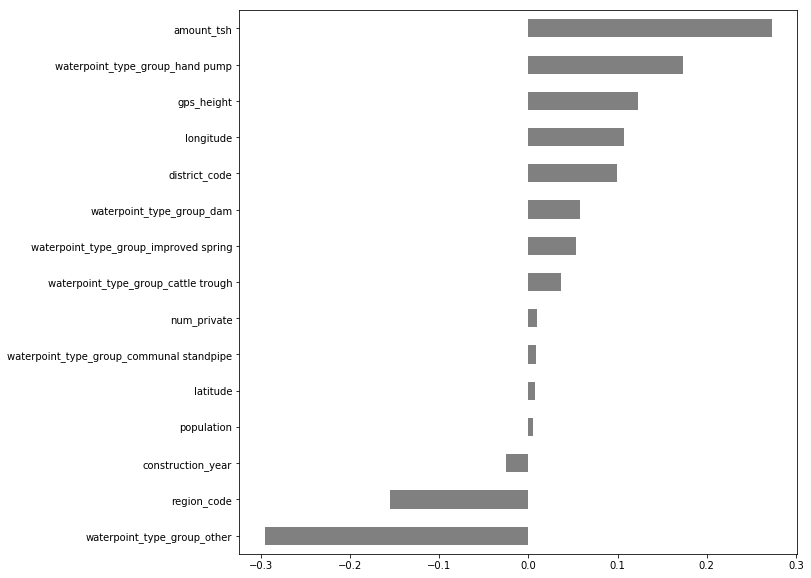

In [57]:
#Get and plot coefficients
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh(color='grey');

In [59]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
all(X_test_encoded.columns == X_train_encoded.columns)

True

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)

In [0]:
from google.colab import files
files.download('submission-01.csv')